Importamos Pandas

In [2]:
import pandas as pd

Cargamos la informacion

In [3]:
df = pd.read_csv("NASDAQ.csv", index_col='Date', parse_dates=True)

Analizamos brevemente la informacion, una ojeada

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,11697.830837,11785.799148,11602.756525,11700.492829,11700.492829,4.299210e+09
std,2479.197910,2489.571778,2463.014300,2477.106954,2477.106954,1.424023e+09
min,6847.279785,6984.939941,6631.419922,6860.669922,6860.669922,1.014530e+09
25%,9402.194824,9489.337402,9347.657226,9404.950440,9404.950440,3.625502e+09
50%,11904.765137,11990.535157,11797.649902,11891.359863,11891.359863,4.437910e+09
75%,13759.037842,13835.800049,13682.149903,13761.322754,13761.322754,5.093615e+09
max,16120.919922,16212.230469,16017.230469,16057.440430,16057.440430,1.162119e+10


Una grafica simple que muestra los precios cuando cierra la bolsa

<Axes: title={'center': 'NASDAQ Valores de Cierre| 7/2/2019-7/2/2024'}, xlabel='Date'>

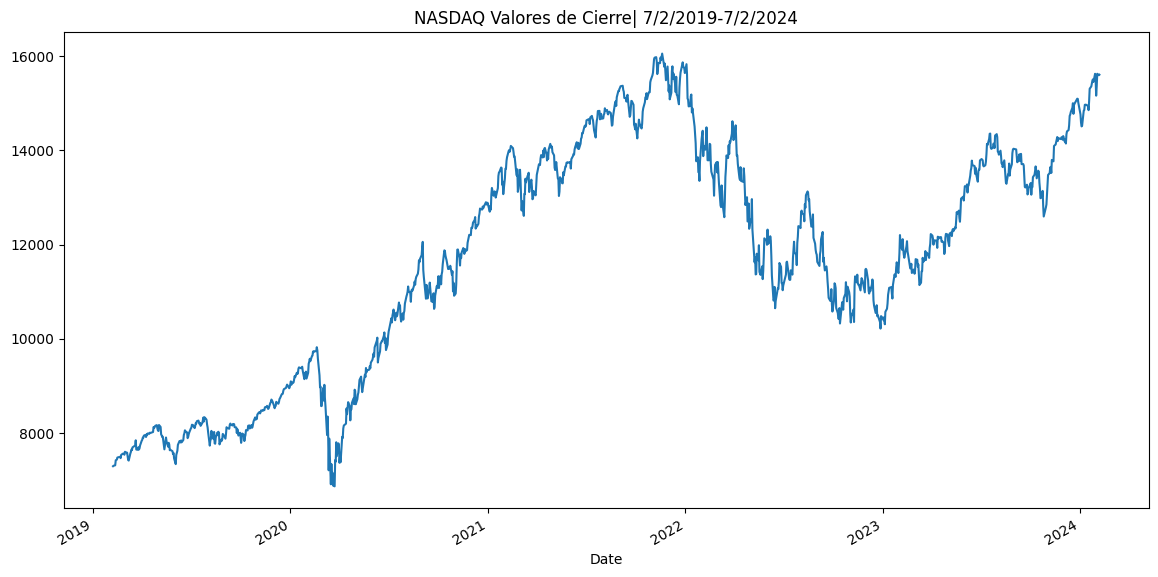

In [9]:
df['Close'].plot(figsize=(14,7),title='NASDAQ Valores de Cierre| 7/2/2019-7/2/2024')

Una grafica simple que compara los valores de apertura y cierre de NASDAQ

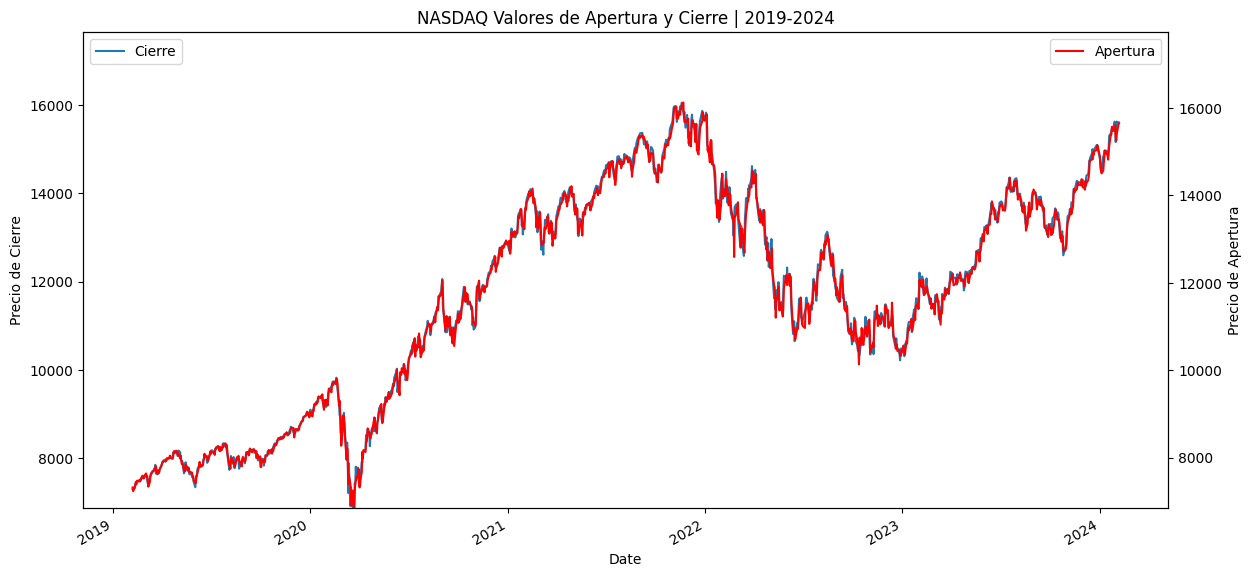

In [13]:
ax1 = df['Close'].plot(figsize=(14, 7), title='NASDAQ Valores de Apertura y Cierre | 2019-2024')
ax1.set_ylabel('Precio de Cierre')

# Luego, crea un segundo eje y traza el precio de apertura (Open)
ax2 = ax1.twinx()
df['Open'].plot(ax=ax2, color='red')
ax2.set_ylabel('Precio de Apertura')

# Ajusta las etiquetas del eje y para ambos ejes
ax1.set_ylim([df['Close'].min(), df['Close'].max() * 1.1])
ax2.set_ylim([df['Open'].min(), df['Open'].max() * 1.1])

# Muestra la leyenda
ax1.legend(['Cierre'], loc='upper left')
ax2.legend(['Apertura'], loc='upper right')



Precio de Cierre y SMA

In [23]:
df['Close_SMA'] = df['Close'].rolling(60).mean()

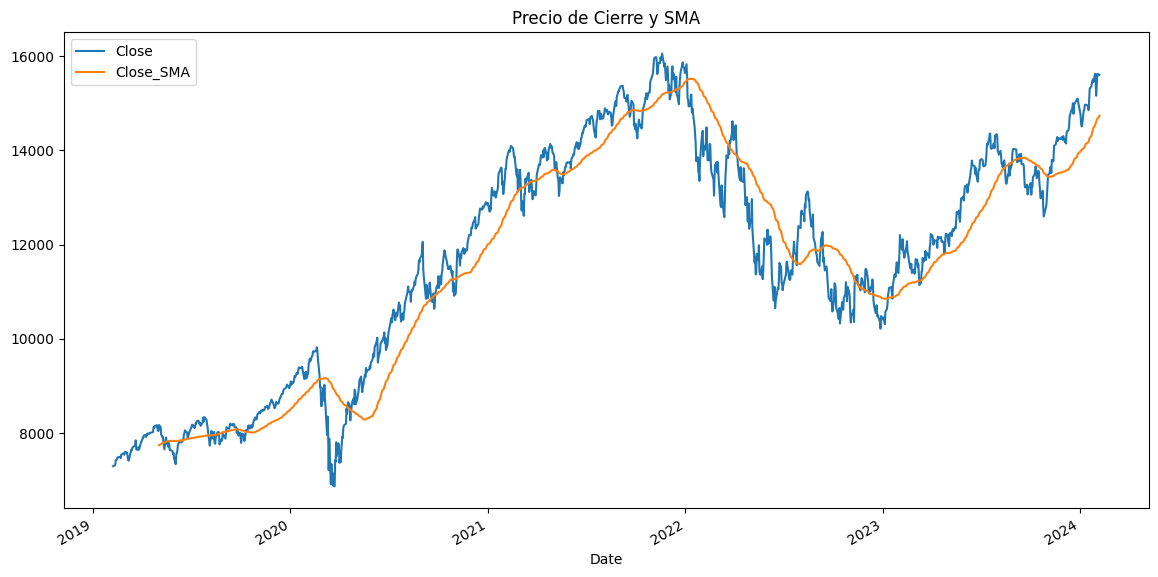

In [25]:
ax = df[['Close', 'Close_SMA']].plot(figsize=(14,7), title='Precio de Cierre y SMA')

Creamos bandas de Bollinger

In [31]:
# Calcula la Banda Inferior de Bollinger
df['Lower_Band'] = df['Close_SMA'] - (2 * df['Close'].rolling(60).std())

# Calcula la Banda Superior de Bollinger
df['Upper_Band'] = df['Close_SMA'] + (2 * df['Close'].rolling(60).std())


<Axes: title={'center': 'Valor de Cierre y SMA'}, xlabel='Date'>

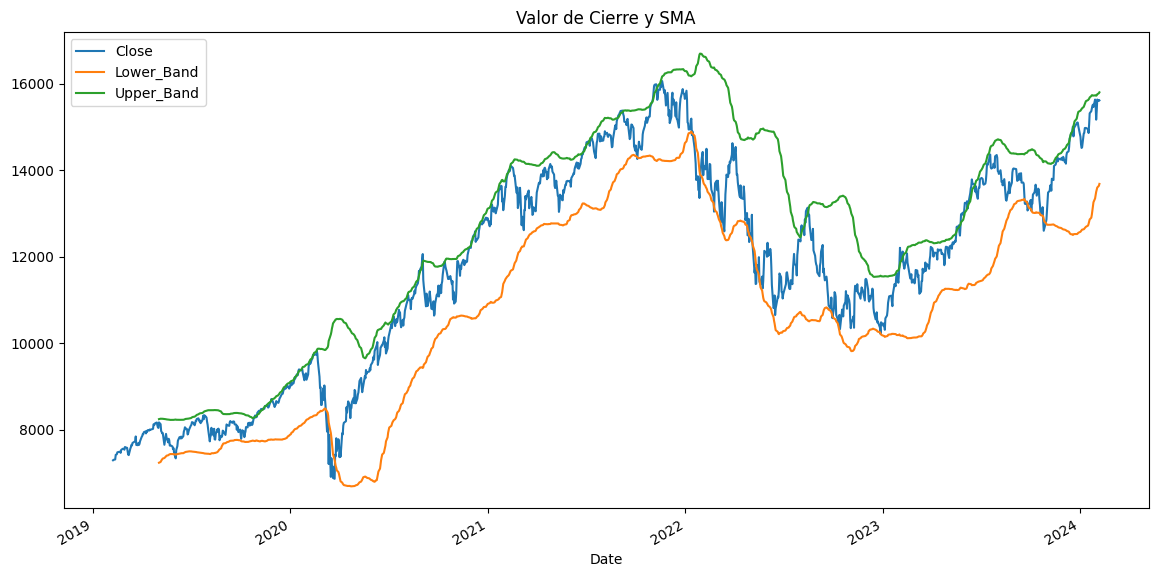

In [40]:
df[['Close', 'Lower_Band', 'Upper_Band']].plot(figsize=(14, 7), title='Valor de Cierre y SMA')
